In [9]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/7_OneCatOneNum.csv'
data = pd.read_csv(url)
print(data.shape)
print(data.columns)

(51, 2)
Index(['Country', 'Value'], dtype='object')


In [10]:
data = data.sort_values(by=['Value'])
data.head()

,Country,Value
47,Serbia,2.0
29,Japan,2.0
21,Poland,3.0
39,Unknown supplier(s),7.0
41,Iran,10.0


# Lollipop / Barplot
Useful when visualizing numeric data across categories when the number of categories is very high (better than barplot in this case).


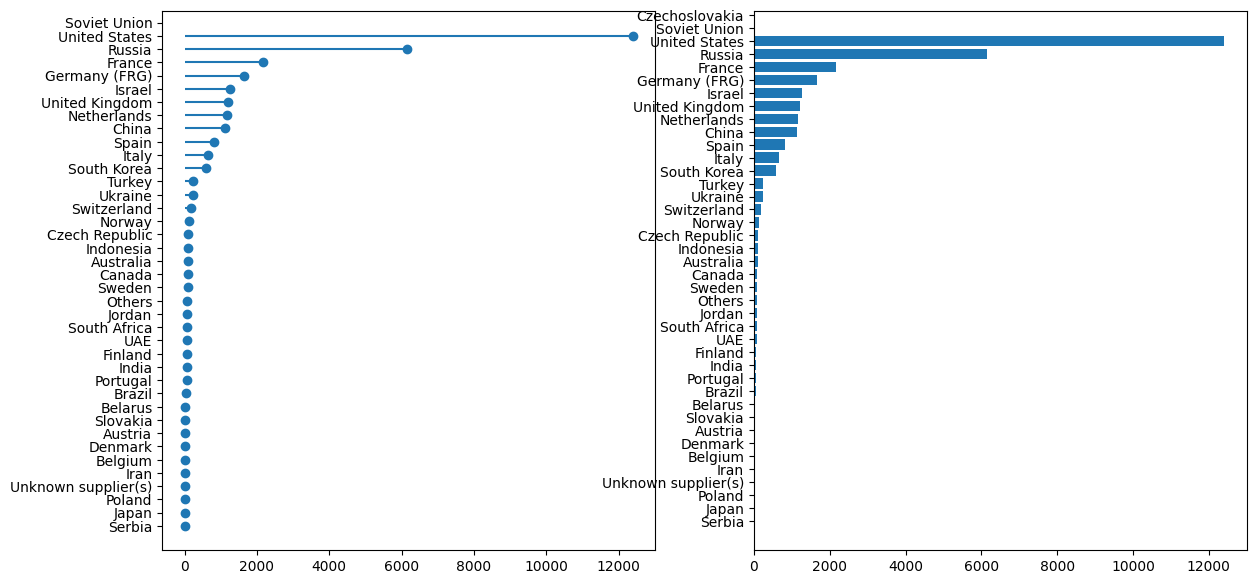

In [29]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14,7))
axs[0].hlines(y=data['Country'], xmin=0, xmax=data['Value'])
axs[0].plot(data['Value'], data['Country'], "o")

axs[1].barh(data['Country'], data['Value'])
plt.show()

# Circular Barplot

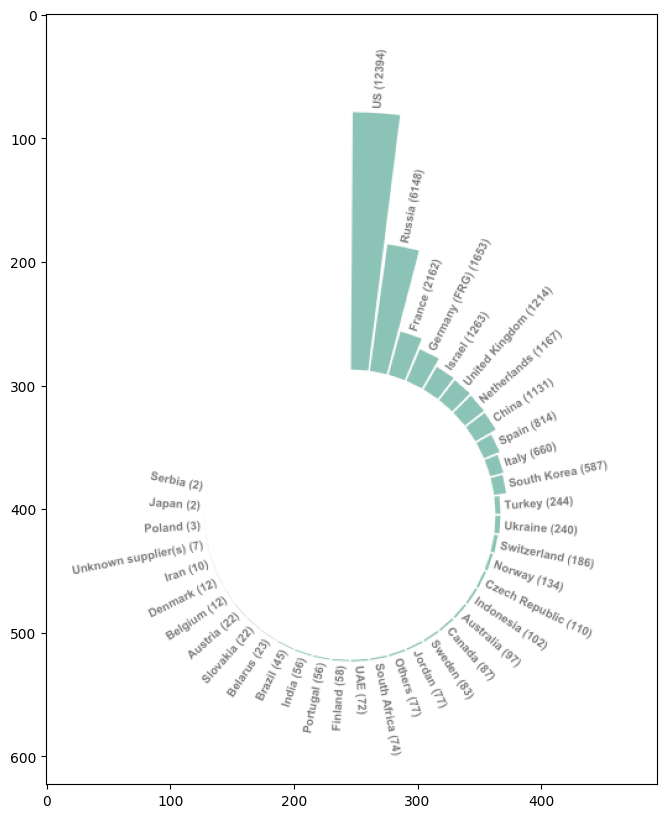

In [64]:
# set figure size
# plt.figure(figsize=(20,10))
from PIL import Image
# plot polar axis
# ax = plt.subplot(111, polar=True)

# remove grid
# plt.axis('off')

# Set the coordinates limits
upperLimit = 13000
lowerLimit = 0

# Compute max and min in the dataset
max = data['Value'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * data.Value + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(data.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(data.index)+1))
angles = [element * width for element in sorted(indexes)]
print()

# print(len(angles))
# print(heights)
# print(width)
# Draw bars

plt.figure(figsize=[10, 10])
plt.imshow(Image.open("image.png"))
plt.show()
# bars = ax.bar(
#     x=angles, 
#     height=heights, 
#     width=width, 
#     bottom=lowerLimit,
#     linewidth=2, 
#     edgecolor="white")

In [72]:
!pip install squarify

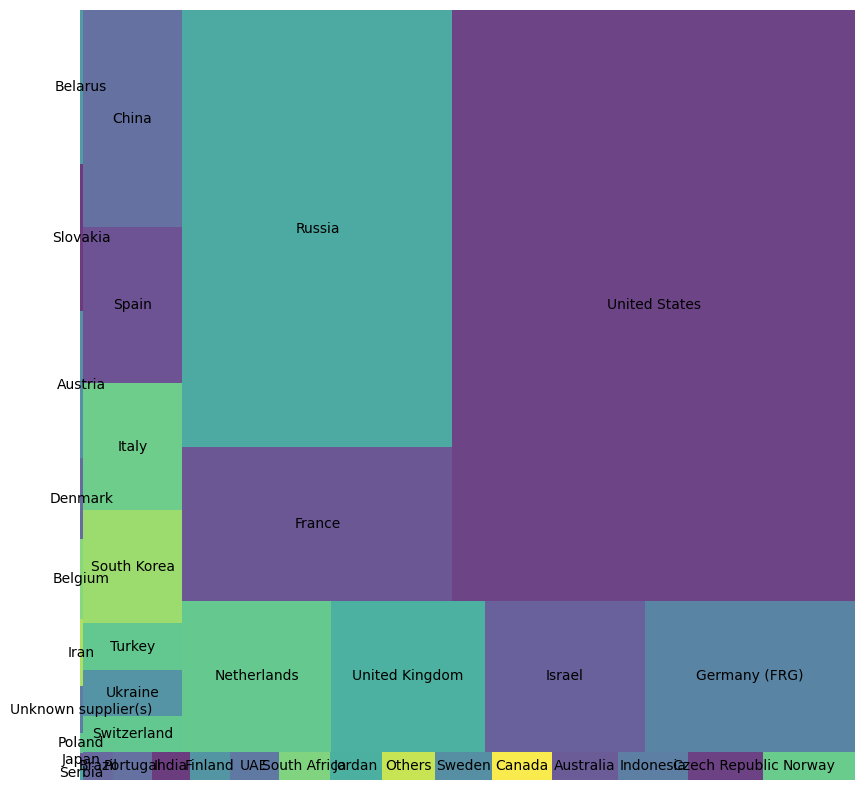

In [74]:
import seaborn as sns
import squarify 
import matplotlib.pyplot as plt

plt.figure(figsize=[10, 10])
data.dropna(inplace=True)
squarify.plot(sizes=data['Value'],label=data['Country'], alpha=.8 )
plt.axis('off')
plt.show()

In [77]:
!pip install circlify
import circlify

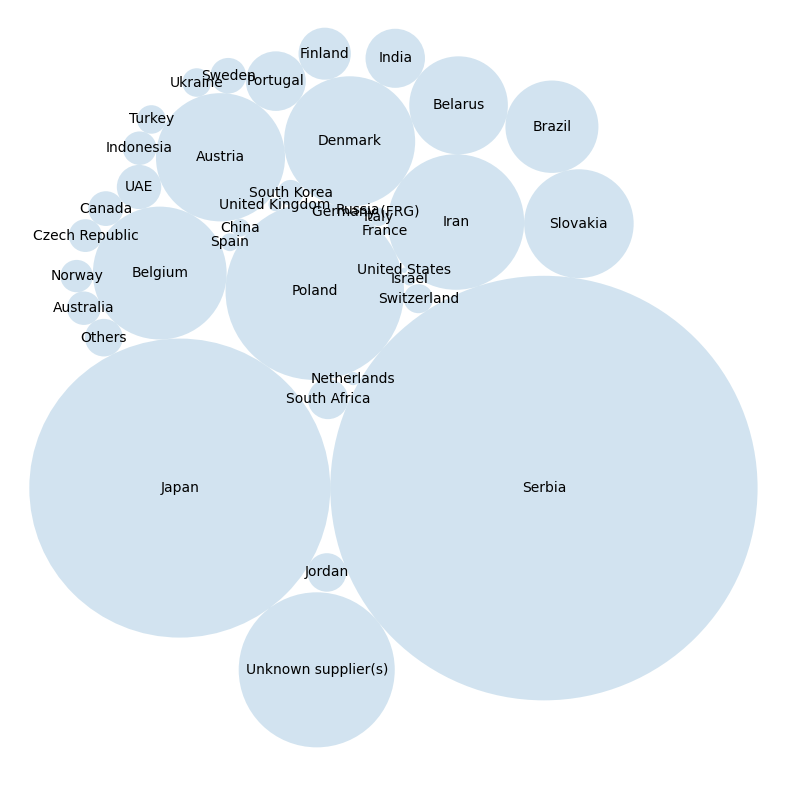

In [78]:
circles = circlify.circlify(
    data['Value'].tolist(), 
    show_enclosure=True, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

fig, ax = plt.subplots(figsize=(10,10))

ax.axis('off')

lim = 1
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

labels = data['Country'][::-1].tolist()

# print circles
for circle, label in zip(circles, labels):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.2, linewidth=10))
    plt.annotate(
          label, 
          (x,y ) ,
          va='center',
          ha='center'
     )
